
# Заголовок первого уровня
## Заголовок второго уровня
**Полужирный текст**, *курсив*, `код в строке`
<br>Список:
- Пункт 1
- Пункт 2
- Пункт 3
<br>Формула: $y = mx + b$

In [ ]:
import os
with open("example.txt", "w") as f:
  f.write("Привет!\n")
  f.write("СКФУ\n")
with open("example.txt", "r") as f:
  content = f.read()
  print("Содержимое файла:\n", content)
print("Файл существует:", os.path.exists("example.txt"))
os.remove("example.txt")
print("Файл удален.")

Содержимое файла:
 Привет!
СКФУ

Файл существует: True
Файл удален.


In [ ]:
%%writefile script.py
%lsmagic
%time sum(range(1000000))
%%timeit sum(range(1000000))
%%writefile script.py
print("Hello, World!")
!python script.py
%ls
%history


Overwriting script.py


In [ ]:
!ls
!which python
!mkdir new_folder
!rmdir new_folder

sample_data  script.py
/usr/local/bin/python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/text.txt'
with open(file_path, 'w') as file:
    file.write('Привет!\n')
    file.write('СКФУ\n')
    file.write('2025\n')
print('Файл успешно сохранен в Google Drive.')
import os
if os.path.exists(file_path):
    print('Файл существует!')
else:
    print('Файл не найден!')
with open(file_path, 'r') as file:
    content = file.read()
print('Содержимое файла:')
print(content)
students = [
    ['Белов Вадим', 20, 'Группа 1'],
    ['Бакулин Вадим', 21, 'Группа 2'],
    ['Кравчук Мирослав', 22, 'Группа 3']
]
csv_path = '/content/drive/MyDrive/students.csv'
with open(csv_path, 'w') as csv_file:
    for student in students:
        line = ','.join([str(item) for item in student]) + '\n'
        csv_file.write(line)
print('CSV-файл успешно сохранен в Google Drive.')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Файл успешно сохранен в Google Drive.
Файл существует!
Содержимое файла:
Привет!
СКФУ
2025

CSV-файл успешно сохранен в Google Drive.


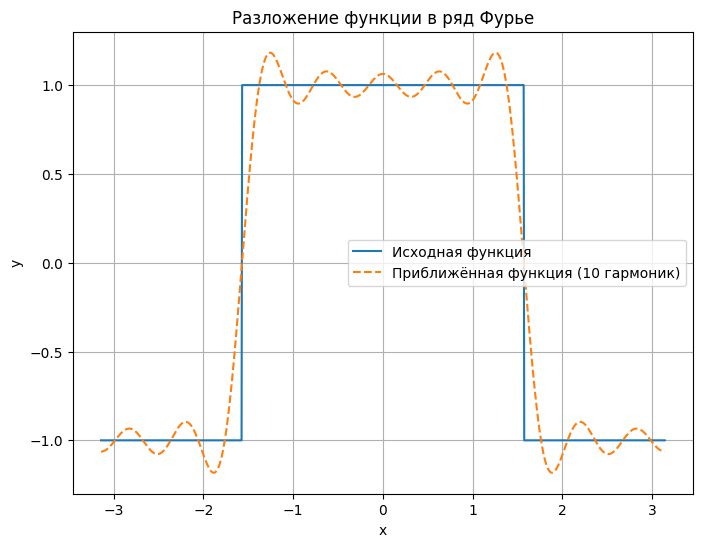

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
def f(x):
    return np.where((x >= -np.pi / 2) & (x <= np.pi / 2), 1, -1)
def compute_fourier_coefficients(f, T, N):
    def integrand_a0(x):
        return f(x)
    result_a0, _ = quad(integrand_a0, -T/2, T/2)
    a0 = result_a0 * (1/T)
    coefficients = []
    for n in range(1, N+1):
        def integrand_an(x):
            return f(x)*np.cos(n*2*np.pi*x/T)

        def integrand_bn(x):
            return f(x)*np.sin(n*2*np.pi*x/T)

        result_an, _ = quad(integrand_an, -T/2, T/2)
        result_bn, _ = quad(integrand_bn, -T/2, T/2)

        an = result_an * (2/T)
        bn = result_bn * (2/T)

        coefficients.append((an, bn))

    return a0, coefficients
def approximate_function(a0, coefficients, x_values, T):
    approximated_values = np.zeros_like(x_values)
    for i, x in enumerate(x_values):
        value = a0
        for j, (an, bn) in enumerate(coefficients):
            n = j + 1
            value += an * np.cos(n*2*np.pi*x/T) + bn * np.sin(n*2*np.pi*x/T)
        approximated_values[i] = value
    return approximated_values
T = 2*np.pi
N = 10
x_values = np.linspace(-np.pi, np.pi, 1000)
a0, coeffs = compute_fourier_coefficients(f, T, N)
approximated_values = approximate_function(a0, coeffs, x_values, T)
plt.figure(figsize=(8, 6))
plt.plot(x_values, f(x_values), label='Исходная функция')
plt.plot(x_values, approximated_values, '--', label=f'Приближённая функция ({N} гармоник)')
plt.legend()
plt.title('Разложение функции в ряд Фурье')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

